기본설정

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

import tensorflow as tf 

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

### Kaggle Dogs vs. Cats 데이터 전처리

In [135]:
TRAIN_DIR = 'datasets/cat_dog/train'
TEST_DIR = 'datasets/cat_dog/test'

print(len(os.listdir(TRAIN_DIR)),len(os.listdir(TEST_DIR)))

train_image_file_names = [TRAIN_DIR + '/' + i for i in os.listdir(TRAIN_DIR)][20000:21000]
test_image_file_names = [TEST_DIR + '/' + i for i in os.listdir(TEST_DIR)][:1]

25000 12500


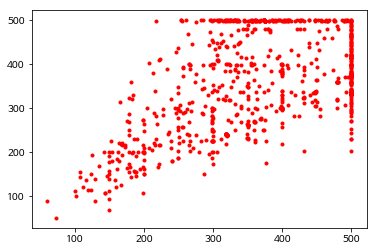

In [136]:
import matplotlib.image as mpimg

data = [mpimg.imread(i) for i in train_image_file_names]
test_data = [mpimg.imread(i) for i in test_image_file_names]

all_images = data + test_data

width = []
height = []
for image in all_images:
    h, w, d = np.shape(image)
    width.append(w)
    height.append(h)
    
plt.plot(width, height, '.r')
plt.show()

전체 데이터 기준으로, 높이와 너비가 500을 넘는 객체는 2개가 있습니다. 2 객체를 지우고, 나머지 이미지의 사이즈를 (500,500)으로 만들겠습니다.

In [137]:
print("number of images which have width over 500:", np.sum(np.array(width) > 500))
print("number of images which have width over 500:", np.sum(np.array(height) > 500))

number of images which have width over 500: 0
number of images which have width over 500: 0


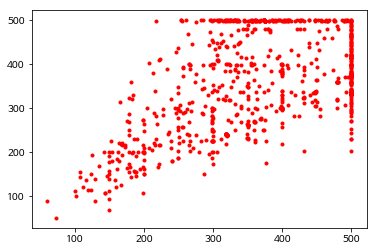

In [138]:
for i in range(2):
    tmp = np.argmax(np.array(width))
    if width[tmp] > 500:
        data.pop(tmp)
        width.pop(tmp)
        height.pop(tmp)
        train_image_file_names.pop(tmp)
    
plt.plot(width, height, '.r')
plt.show()

In [139]:
def create_data(image_file_names, width=500, height=500, final_width=214, final_height=214):
    import scipy.misc
    
    def resize_width_height(image, width=width, height=width, final_width=final_width, final_height=final_height):
        tmp = np.zeros((width,height,3))
        tmp[:image.shape[0], :image.shape[1], :] = image
        tmp = scipy.misc.imresize(tmp, (final_width,final_height))
        tmp = tmp/ 255
        return tmp.reshape(-1, final_width, final_height, 3) ## batch, width, height, channel
    
    data = np.zeros((1, final_width, final_height, 3))
    num = 0
    for i in image_file_names:
        tmp = mpimg.imread(i)
        data = np.r_[data, resize_width_height(tmp)]
        if num % 10 == 0:
            print("아직 문제 없습니다.", num, end='\r')
        num += 1
    return data[1:,:,:,:]

In [140]:
train_data0 = create_data(train_image_file_names[:500]) 
## train_image_file은 이미지 주소가 있는 str입니다.
test_data0 = create_data(test_image_file_names[:500])

train_data1 = create_data(train_image_file_names[500:]) 
## train_image_file은 이미지 주소가 있는 str입니다.
test_data1 = create_data(test_image_file_names[500:])

train_data = np.r_[train_data0, train_data1]
test_data = np.r_[test_data0, test_data1]

c:\python\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  import sys


In [141]:
train_data.shape, test_data.shape

((1000, 214, 214, 3), (1, 214, 214, 3))

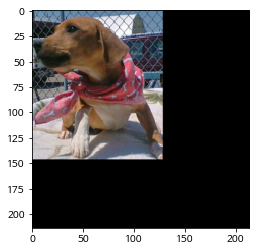

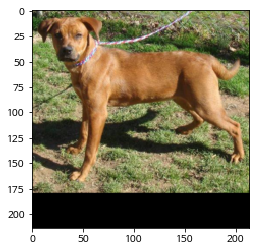

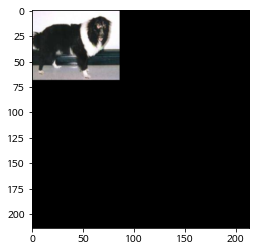

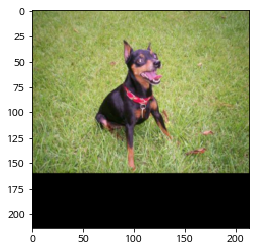

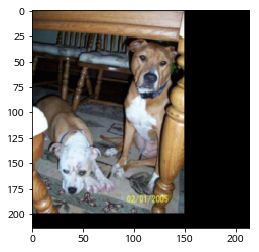

In [142]:
for i in train_data[:5]:
    plt.imshow(i)
    plt.show()

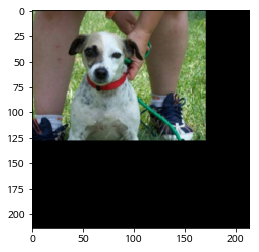

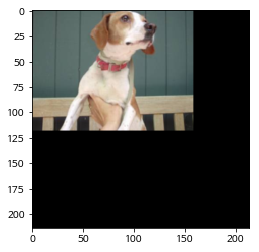

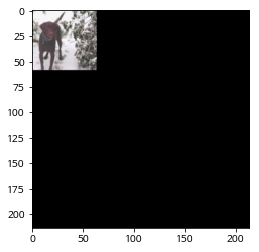

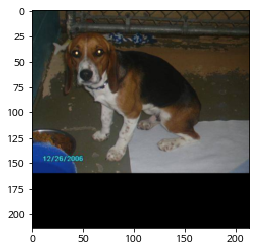

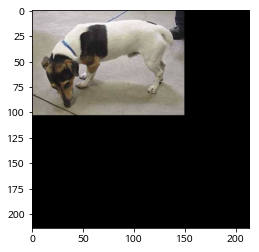

In [143]:
for i in train_data[-5:]:
    plt.imshow(i)
    plt.show()

In [144]:
labels = np.array([[1., 0.] if 'dog' in name[23:] else [0., 1.] for name in train_image_file_names])

In [145]:
labels.shape

(1000, 2)

In [146]:
labels[:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [147]:
labels[-5:]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

### CSV파일 만들기

In [148]:
import pandas as pd

In [149]:
train_data_reshape = train_data.reshape(-1, 214*214*3)
test_data_reshape = test_data.reshape(-1, 214*214*3)

In [150]:
train_data_df = pd.DataFrame(train_data_reshape)
labels_df = pd.DataFrame(labels)
test_data_df = pd.DataFrame(test_data_reshape)

In [151]:
train_data_df.to_csv("train12.csv", header=True, index=False, encoding='ms949')
labels_df.to_csv("label12.csv", header=True, index=False, encoding='ms949')
#test_data_df.to_csv("test9.csv", header=True, index=False, encoding='ms949')

In [152]:
print('끝' * 50)

끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝끝
